<div style="display: block;margin-left: auto;margin-right: auto;width: 100%;text-align: center;">
<br><a href="https://www.youtube.com/watch?v=_Wkx_447zBM&list=PLEiEAq2VkUULYYgj13YHUWmRePqiu8Ddy&index=7"><b> Source</b></a></div>

# 1. Clustering
***
### <center> Theoretical part

<center>Let's say we have a pile of books of diffrent genres. We divide them into diffrent groups like: Fiction, Horror, Education, ...
<center>Organizing objects into groups based on their similarity is clustering!

## <p align="right"> K-means Clusternig
    - K-Means Clustering is an example of unsupervised learning.
    - it is used when you have unlabeled data to finde clusters in the data based on similarity

### <center>Steps for clustering
    1. Initialize Cluster Centroids
    - we pick "K" cluster and assign random centroids to clusters
    - then we compute distance from objects to centroids
    
![](pic/v7/1s.png)
     
       2. Compute minimum distance
    - we form new clusters based on minimum distance and calculate their centorids
![](pic/v7/2s.png)    

       3. Assingn points to new cluster
    - repeat previous two steps iteratively till the cluster centroids stop charging their positions and become static
![](pic/v7/3s.png) 

       - once the clusters become static then k-means clustering algorithm is said to be converged

<center><b>Step by step example</b>

![](pic/v7/4s.png)

<center>EXAMPLE
    
- let's say we have this dataset of 7 individuals and their score on two topics (A and B)
- and we take two farthest-apart points as inital cluster centroids
![](pic/v7/5s.png)

- each point is then assigned to the closest cluster with respect to their distance drom the centroids
![](pic/v7/6s.png)

- next step
![](pic/v7/7s.png)

- we compare each individuals distance to its own cluster mean and to that of the opposite cluster, and we find:
![](pic/v7/8s.png)
![](pic/v7/9s.png)
![](pic/v7/10s.png)

- on comparing the distance of each individuals distance to it's own cluster mean and to that of the opposite cluster, we find that the data points are stable, hance we have our data final clusters!

![](pic/v7/11s.png)



# 2. K-means clustering - practical example
***

### - using K-means clustering to cluster cars into brands using the parameters such as HP, cubic inches, make year, ect.

Dataset: cars having info about 3 brand cars (Toyota, Honda, Nissan)
 

In [1]:
# import lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# allows charts to appear in jupyter
%matplotlib inline

In [2]:
dataset=pd.read_csv("Data/cars(dataset for k means).csv")
dataset.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,Toyota
1,31.9,4,89,71,1925,14,1980,Honda
2,17.0,8,302,140,3449,11,1971,Toyota
3,15.0,8,400,150,3761,10,1971,Toyota
4,30.5,4,98,63,2051,17,1978,Toyota


In [3]:
# we only want to have numerical values, so we remove last column with car brands
X = dataset[dataset.columns[:-1]]
X = X.convert_objects(convert_numeric=True)
X.head()

C:\Users\X\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350.0,165,4209.0,12,1972
1,31.9,4,89.0,71,1925.0,14,1980
2,17.0,8,302.0,140,3449.0,11,1971
3,15.0,8,400.0,150,3761.0,10,1971
4,30.5,4,98.0,63,2051.0,17,1978


In [4]:
# eliminating null values
for i in X.columns:
    X[i] = X[i].fillna(int(X[i].mean()))
for i in X.columns:
    print(X[i].isnull().sum())

0
0
0
0
0
0
0


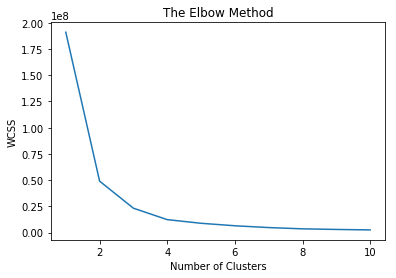

In [5]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [6]:
# applying k-means to the cars data set
kmeans = KMeans(n_clusters=3, init="k-means++", max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)
X = X.as_matrix(columns=None)

C:\Users\X\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [7]:
print(y_kmeans)

[2 1 0 2 1 2 2 2 0 1 1 1 2 0 0 2 1 0 1 1 1 1 0 2 1 1 1 2 0 1 1 0 1 0 1 0 1
 1 2 0 2 2 0 0 0 1 2 1 1 0 2 0 0 1 2 2 0 1 1 2 0 1 0 1 2 0 1 1 1 2 0 1 1 1
 1 0 0 1 1 1 2 2 0 1 1 1 0 0 1 1 1 1 2 0 1 2 2 0 2 2 2 2 1 1 1 1 1 1 1 0 1
 0 2 1 1 2 0 0 1 2 1 1 2 0 1 1 2 1 1 1 1 1 2 0 2 2 1 0 0 0 1 1 1 1 0 0 0 0
 0 0 1 1 2 0 1 0 1 1 1 0 0 2 0 0 1 0 0 1 0 1 1 0 0 1 1 1 2 0 0 1 0 1 2 0 1
 0 0 2 2 2 1 1 2 2 2 1 1 1 1 1 1 1 0 0 1 2 1 0 2 0 0 0 1 1 0 1 1 2 1 2 0 0
 2 2 2 1 2 1 1 0 0 1 1 2 0 1 2 0 1 1 2 0 2 1 2 0 2 1 1 1 1 1 0 2 0 1 2 1 0
 0 0]


In [8]:
print(X)

[[1.400e+01 8.000e+00 3.500e+02 ... 4.209e+03 1.200e+01 1.972e+03]
 [3.190e+01 4.000e+00 8.900e+01 ... 1.925e+03 1.400e+01 1.980e+03]
 [1.700e+01 8.000e+00 3.020e+02 ... 3.449e+03 1.100e+01 1.971e+03]
 ...
 [2.200e+01 6.000e+00 2.320e+02 ... 2.835e+03 1.500e+01 1.983e+03]
 [1.800e+01 6.000e+00 2.320e+02 ... 3.288e+03 1.600e+01 1.972e+03]
 [2.200e+01 6.000e+00 2.500e+02 ... 3.353e+03 1.500e+01 1.977e+03]]


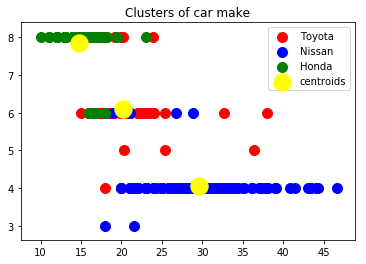

In [9]:
# only column 1 and 2

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],s=100,c="red",label="Toyota")
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],s=100,c="blue",label="Nissan")
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],s=100,c="green",label="Honda")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=300,c="yellow",label="centroids")
plt.title("Clusters of car make")
plt.legend()
plt.show()

# 3. Logistic regression
***
### <center> Theoretical part
    - the logistic regression algorithm is the simplest classification algorithm used for binary or multi-classification problems
    - let's reminde ourselfs of linear regression

<center><b>y = mx + c</b>
    
- y -> the dependent variable is the target class variable we are going to predict
    
- rest of the formula -> the independent varibles (m,c) are the features or attributes we are going to use to predict the target class

    - We know waht a linear regression looks like, but using this graph we cannot devide the outcome into categories
![](pic/v7/12s.png)

    - We know what a linear regression looks like, but using this graph we cannot divide the outcome into categories
    - For example, a linear regression graph can tell us that with increase in number of hours studied, the marks of a student will increase, but it will not tell us whether the student will pass or not


- In such cases, where we need the output as categorical value, we will use logistic regression

- For that we will use the Sigmoid function:
![](pic/v7/13s.png)
![](pic/v7/14s.png)

# 4. Logistic regression - practical example
***

### Classify whether a tumor is "malignant" or "benign"

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
data = pd.read_csv("Data/data-cancer.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


C:\Users\X\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


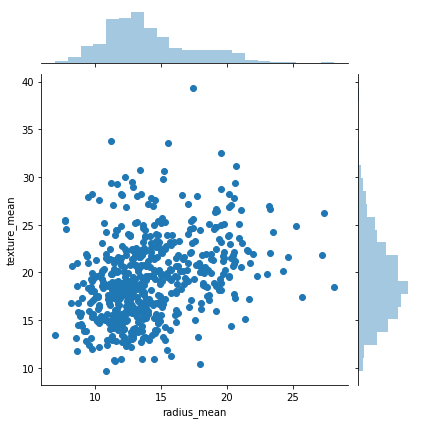

In [12]:
sns.jointplot("radius_mean", "texture_mean", data=data)

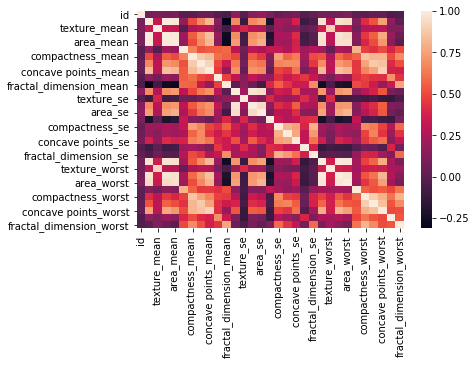

In [13]:
sns.heatmap(data.corr())

In [14]:
data.isnull().sum() # colums doesn't have any nulls

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [15]:
X = data[["radius_worst", "texture_worst", "perimeter_worst", "area_worst", 
       "smoothness_worst", "compactness_worst", "concavity_worst",
      "concave points_worst", "symmetry_worst", "fractal_dimension_worst"]]
y = data["diagnosis"]

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [17]:
from sklearn.linear_model import LogisticRegression

logModel = LogisticRegression()
logModel.fit(X_train, y_train)

C:\Users\X\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
y_pred = logModel.predict(X_test)
print(y_pred)

['B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B'
 'M' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M'
 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'B'
 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M'
 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B'
 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B']


In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.93      0.97      0.95       105
           M       0.95      0.88      0.91        66

   micro avg       0.94      0.94      0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

